In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [9]:
# 2. Đọc file dữ liệu chứng khoán và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/PLC Dataset.csv')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [10]:
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return int(volume_str)

In [11]:
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Trading Volume"] = df["Trading Volume"].apply(convert_volume_to_number)
df

,Date,Price,Open,High,Low,Trading Volume,% Change
0,1/12/2017,"22,781.00","23,230.00","23,230.00","22,602.00",6120,1.60%
1,4/12/2017,"22,961.00","24,037.00","24,037.00","22,871.00",4360,0.79%
2,5/12/2017,"22,961.00","23,589.00","23,589.00","22,602.00",5950,0.00%
3,6/12/2017,"22,871.00","22,871.00","22,961.00","22,871.00",10700,-0.39%
4,7/12/2017,"22,512.00","22,423.00","22,512.00","22,423.00",7100,-1.57%
...,...,...,...,...,...,...,...
1356,12/6/2023,"35,900.00","35,900.00","36,500.00","35,700.00",534190,0.28%
1357,13/06/2023,"36,300.00","35,900.00","36,500.00","35,900.00",212200,1.11%
1358,14/06/2023,"36,200.00","36,300.00","36,700.00","36,200.00",269670,-0.28%
1359,15/06/2023,"37,400.00","36,100.00","37,400.00","34,400.00",478330,3.31%


In [12]:
# Hàm chuyển đổi "%Change" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

In [14]:
# Áp dụng hàm chuyển đổi cho cột "Change %"
df["% Change"] = df["% Change"].apply(convert_change_to_number)
df

,Date,Price,Open,High,Low,Trading Volume,% Change
0,1/12/2017,"22,781.00","23,230.00","23,230.00","22,602.00",6120,0.0160
1,4/12/2017,"22,961.00","24,037.00","24,037.00","22,871.00",4360,0.0079
2,5/12/2017,"22,961.00","23,589.00","23,589.00","22,602.00",5950,0.0000
3,6/12/2017,"22,871.00","22,871.00","22,961.00","22,871.00",10700,-0.0039
4,7/12/2017,"22,512.00","22,423.00","22,512.00","22,423.00",7100,-0.0157
...,...,...,...,...,...,...,...
1356,12/6/2023,"35,900.00","35,900.00","36,500.00","35,700.00",534190,0.0028
1357,13/06/2023,"36,300.00","35,900.00","36,500.00","35,900.00",212200,0.0111
1358,14/06/2023,"36,200.00","36,300.00","36,700.00","36,200.00",269670,-0.0028
1359,15/06/2023,"37,400.00","36,100.00","37,400.00","34,400.00",478330,0.0331


In [15]:
# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

In [16]:
# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

df['Date'] = pd.to_datetime(df['Date'])

df

<ipython-input-16-d344abaf4d3b>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Price,Open,High,Low,Trading Volume,% Change
0,2017-01-12,22781.0,23230.0,23230.0,22602.0,6120,0.0160
1,2017-04-12,22961.0,24037.0,24037.0,22871.0,4360,0.0079
2,2017-05-12,22961.0,23589.0,23589.0,22602.0,5950,0.0000
3,2017-06-12,22871.0,22871.0,22961.0,22871.0,10700,-0.0039
4,2017-07-12,22512.0,22423.0,22512.0,22423.0,7100,-0.0157
...,...,...,...,...,...,...,...
1356,2023-12-06,35900.0,35900.0,36500.0,35700.0,534190,0.0028
1357,2023-06-13,36300.0,35900.0,36500.0,35900.0,212200,0.0111
1358,2023-06-14,36200.0,36300.0,36700.0,36200.0,269670,-0.0028
1359,2023-06-15,37400.0,36100.0,37400.0,34400.0,478330,0.0331


In [17]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,22781.0
1,22961.0
2,22961.0
3,22871.0
4,22512.0
...,...
1356,35900.0
1357,36300.0
1358,36200.0
1359,37400.0


In [18]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [19]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [22]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [23]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[29758.22157157 29770.05688863 29781.89220568 29793.72752274
 29805.56283979 29817.39815685 29829.2334739  29841.06879096
 29852.90410801 29864.73942507 29876.57474212 29888.41005918
 29900.24537623 29912.08069329 29923.91601034 29935.7513274
 29947.58664445 29959.42196151 29971.25727856 29983.09259562
 29994.92791267 30006.76322973 30018.59854678 30030.43386384
 30042.26918089 30054.10449795 30065.939815   30077.77513206
 30089.61044911 30101.44576617]


In [24]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 5224.381648606253
Testing RMSE: 10662.177335822613


Validation RMSE: 5224.381648606253
Testing RMSE: 10662.177335822613


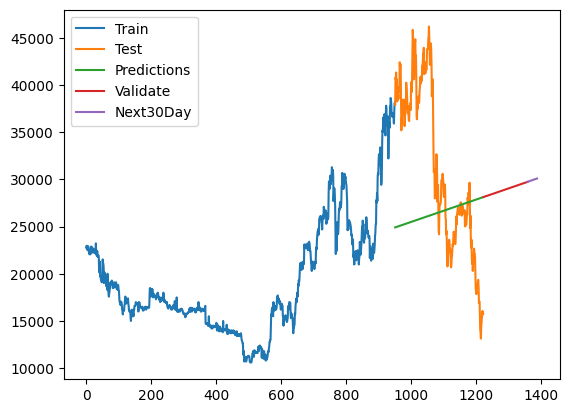

In [26]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [27]:
test_data.index

RangeIndex(start=952, stop=1224, step=1)